# Preparation

In [ ]:
#mengimport package

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import seaborn as sns
import datetime
from time import time

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sa
import statsmodels.formula.api as sm
%matplotlib inline

#mengimport metode yang dipakai untuk membagi data menjadi latihan & uji

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#mengimport Ridge untuk mencegah overfitting sehingga model dapat lebih andal
from sklearn.linear_model import Ridge
from scipy.stats import kstest, norm, pearsonr
import scipy.stats as stats

## Eksplor Data Sumber

In [ ]:
# connect data
url = "https://github.com/Riskyrianda/Data_analyst/blob/main/Database_CSV/Project1_6A.csv?raw=true"
data=pd.read_csv(url)
data.head()

,id_pengguna,nama_pengguna,tanggal_lahir,jenis_kelamin,id_kelas,nama_kelas,bidang_studi,skor_akhir,rating_kelas,aktivitas_belajar
0,84712c881cf472d8afca2b957cd573b0,V E****,1965-01-21,female,29a1e3ee5958cb12970a0c097fbe2089,Men***************************************,Pengelolaan Keuangan Pribadi,87.0,5.0,daring
1,747a026a8dab2607509f154d2c67f51d,Muh*******************************,1994-01-04,male,262cf9b725395d261f41ca335b0418c5,Men*******************************************...,Bahasa Indonesia,90.0,5.0,luring
2,4772f54956a70a1d1546494bb839760b,WID***********,1986-07-26,female,4f1a38d85810407ee7b6de9b323b1acc,Gur*****************,Pendidikan & Pelatihan,70.0,5.0,daring
3,d6be63e9ae829aae2e0c09980e9d76c2,MUH**************************,1991-08-13,male,89ecd896ec4b7ee6bbdab2f06faddaa8,Men***********************************,Pengolahan dan Penyajian Makanan,73.5,5.0,daring
4,406ab42268988ae9553faba35e3c06f2,Ann****************,2000-09-02,female,c4826ae22f2d08b3e46d2ac3fe4b793b,Tek********************************************,Soft Skills,NaN,5.0,luring


In [ ]:
# tampilkan jumlah baris dan data

data.shape

(8000, 10)

# Data cleaning

## Cek Data Duplikat

In [ ]:
# mari kita lihat apakah terdapat duplikat di data kita

print(f" {data.duplicated().sum()} baris data duplikat ditemukan")

 7 baris data duplikat ditemukan


In [ ]:
# hapus data duplikat


data = data.drop_duplicates().reset_index(drop=True)

In [ ]:
# Cek Kembali data Duplikat

print(f" {data.duplicated().sum()} baris data duplikat ditemukan")

 0 baris data duplikat ditemukan


## Pengecekan Missing Value



In [ ]:
# Cek missing values

missing_values = data.isnull().sum()
print(missing_values)


id_pengguna             0
nama_pengguna           1
tanggal_lahir           0
jenis_kelamin         659
id_kelas                0
nama_kelas              0
bidang_studi            5
skor_akhir           1563
rating_kelas         1040
aktivitas_belajar       0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7993 entries, 0 to 7992
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_pengguna        7993 non-null   object 
 1   nama_pengguna      7992 non-null   object 
 2   tanggal_lahir      7993 non-null   object 
 3   jenis_kelamin      7334 non-null   object 
 4   id_kelas           7993 non-null   object 
 5   nama_kelas         7993 non-null   object 
 6   bidang_studi       7988 non-null   object 
 7   skor_akhir         6430 non-null   float64
 8   rating_kelas       6953 non-null   float64
 9   aktivitas_belajar  7993 non-null   object 
dtypes: float64(2), object(8)
memory usage: 624.6+ KB


In [ ]:
# Proporsi missing value di tiap var

(data.isna().sum() / data.shape[0]) * 100

id_pengguna           0.000000
nama_pengguna         0.012511
tanggal_lahir         0.000000
jenis_kelamin         8.244714
id_kelas              0.000000
nama_kelas            0.000000
bidang_studi          0.062555
skor_akhir           19.554610
rating_kelas         13.011385
aktivitas_belajar     0.000000
dtype: float64

In [ ]:
#Hapus data dengan persentase missing value lebih dari 5%
data.dropna(subset=['nama_pengguna'], inplace=True)
data.dropna(subset=['bidang_studi'], inplace=True)

## Imputasi / Mengisi missing values

In [ ]:
# Menampilkan data jenis kelamin
count_jenis_kelamin = data['jenis_kelamin'].value_counts()
print(count_jenis_kelamin)

male         3789
female       3506
Perempuan      17
Laki-laki      16
Name: jenis_kelamin, dtype: int64


In [ ]:
# Mengganti nilai Business Management ke Bisnis Manajemen
data['bidang_studi'] = data['bidang_studi'].replace({'Bisnis & Manajemen': 'Bisnis Manajemen', 'Business Management': 'Bisnis Manajemen'})

# Menampilkan hasil
print(data)


                           id_pengguna                       nama_pengguna  \
0     84712c881cf472d8afca2b957cd573b0                             V E****   
1     747a026a8dab2607509f154d2c67f51d  Muh*******************************   
2     4772f54956a70a1d1546494bb839760b                      WID***********   
3     d6be63e9ae829aae2e0c09980e9d76c2       MUH**************************   
4     406ab42268988ae9553faba35e3c06f2                 Ann****************   
...                                ...                                 ...   
7988  bc98fdd893e5aca3d4c8446b418b712f                             Ros****   
7989  2b9998c2c60175c9d4993af96545b851                      SAN***********   
7990  3b6f6030630e0449e71b72476b38429f                     M F************   
7991  f4b6e9a1b3d496c8511ae9f31b7b10da                       LIL**********   
7992  19e0cfe1c78ce38e4ec4fe8430840819    ELI*****************************   

     tanggal_lahir jenis_kelamin                          id_ke

In [ ]:
# Mengganti nilai 'Perempuan' dan 'Laki-laki' menjadi 'female' dan 'male'
data['jenis_kelamin'] = data['jenis_kelamin'].replace({'Perempuan': 'female', 'Laki-laki': 'male'})

# Menampilkan hasil
print(data)


                           id_pengguna                       nama_pengguna  \
0     84712c881cf472d8afca2b957cd573b0                             V E****   
1     747a026a8dab2607509f154d2c67f51d  Muh*******************************   
2     4772f54956a70a1d1546494bb839760b                      WID***********   
3     d6be63e9ae829aae2e0c09980e9d76c2       MUH**************************   
4     406ab42268988ae9553faba35e3c06f2                 Ann****************   
...                                ...                                 ...   
7988  bc98fdd893e5aca3d4c8446b418b712f                             Ros****   
7989  2b9998c2c60175c9d4993af96545b851                      SAN***********   
7990  3b6f6030630e0449e71b72476b38429f                     M F************   
7991  f4b6e9a1b3d496c8511ae9f31b7b10da                       LIL**********   
7992  19e0cfe1c78ce38e4ec4fe8430840819    ELI*****************************   

     tanggal_lahir jenis_kelamin                          id_ke

In [ ]:
#cek ulang nilai di kolom jenis_kelamin
count_jenis_kelamin = data['jenis_kelamin'].value_counts()
print(count_jenis_kelamin)

male      3805
female    3523
Name: jenis_kelamin, dtype: int64


In [ ]:
#imputasi nilai missing value di jenis_kelamin dengan modus "male"
data['jenis_kelamin'].fillna('male', inplace=True)

In [ ]:
#cek nilai data skor akhir
median_skor_akhir = data['skor_akhir'].median()

# Menampilkan nilai tengah
print("Nilai Tengah (Median) dari skor_akhir:", median_skor_akhir)

Nilai Tengah (Median) dari skor_akhir: 81.75


In [ ]:
count_skor_akhir = data['skor_akhir'].value_counts()
print(count_skor_akhir)

100.00    604
0.00      487
80.00     332
90.00     251
70.00     151
         ... 
29.00       1
7.30        1
74.85       1
89.70       1
51.25       1
Name: skor_akhir, Length: 546, dtype: int64


In [ ]:
#imputasi missing value pada skor_akhir dengan median
data['skor_akhir'].fillna('81.7', inplace=True)

In [ ]:
#cek nilai data di rating_kelas
count_rating_kelas = data['rating_kelas'].value_counts()
print(count_rating_kelas)

5.0    6356
4.0     467
3.0      97
1.0      20
2.0       9
Name: rating_kelas, dtype: int64


In [ ]:
# kita lakukan imputasi pada rating kelas dengan nilai modus "5.0"
data['rating_kelas'].fillna('5.0', inplace=True)


In [ ]:
#Cek kembali Proporsi missing value di tiap var setelah dilakukan imputasi

(data.isna().sum() / data.shape[0]) * 100

id_pengguna          0.0
nama_pengguna        0.0
tanggal_lahir        0.0
jenis_kelamin        0.0
id_kelas             0.0
nama_kelas           0.0
bidang_studi         0.0
skor_akhir           0.0
rating_kelas         0.0
aktivitas_belajar    0.0
dtype: float64

## Irrelevant

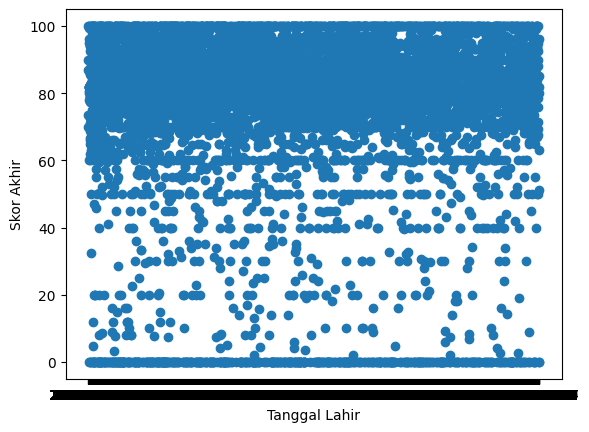

In [ ]:
# Membuat scatter plot

plt.scatter(data['tanggal_lahir'], data['skor_akhir'])
plt.xlabel('Tanggal Lahir')
plt.ylabel('Skor Akhir')
plt.show()


## Outliner

In [ ]:
# Hapus Outliner
# membuat fungsi cek outlier.
def cek_outlier(skor_akhir, batas):
  data[skor_akhir] = pd.to_numeric(data[skor_akhir], errors='coerce')

  Q1 = np.percentile(data[skor_akhir], 25,
                     method = 'midpoint')

  Q3 = np.percentile(data[skor_akhir], 75,
                     method = 'midpoint')

  IQR = Q3 - Q1

  if batas == 'upper_bound':
      bound = np.where(data[skor_akhir] >= (Q3 + 1.5*IQR))
  elif batas == 'lower_bound':
      bound = np.where(data[skor_akhir] <= (Q1 - 1.5*IQR))
  return list(bound[0])

  # jalankan fungsi untuk mendapatkan index data yang merupakan outlier

upper_skor_akhir = cek_outlier('skor_akhir', 'upper_bound')
lower_skor_akhir = cek_outlier('skor_akhir', 'lower_bound')
print(f" Ditemukan {len(upper_skor_akhir) + len(lower_skor_akhir)} baris outliner pada kolom skor_akhir")

 Ditemukan 931 baris outliner pada kolom skor_akhir


## Ditemukan 931 outliner, persentase ouliner 11.63% karena outliner data > 5% maka outliner akan dilakukan imputasi menggunakan nilai modus

In [ ]:
# Mendapatkan indeks data outliner
indeks_outlier = upper_skor_akhir + lower_skor_akhir

# Mengubah nilai outlier menjadi 81.7
nilai_baru = 81.7
data.loc[indeks_outlier, 'skor_akhir'] = nilai_baru

# Menampilkan DataFrame setelah mengganti nilai outlier
print(data)


                           id_pengguna                       nama_pengguna  \
0     84712c881cf472d8afca2b957cd573b0                             V E****   
1     747a026a8dab2607509f154d2c67f51d  Muh*******************************   
2     4772f54956a70a1d1546494bb839760b                      WID***********   
3     d6be63e9ae829aae2e0c09980e9d76c2       MUH**************************   
4     406ab42268988ae9553faba35e3c06f2                 Ann****************   
...                                ...                                 ...   
7988  bc98fdd893e5aca3d4c8446b418b712f                             Ros****   
7989  2b9998c2c60175c9d4993af96545b851                      SAN***********   
7990  3b6f6030630e0449e71b72476b38429f                     M F************   
7991  f4b6e9a1b3d496c8511ae9f31b7b10da                       LIL**********   
7992  19e0cfe1c78ce38e4ec4fe8430840819    ELI*****************************   

     tanggal_lahir jenis_kelamin                          id_ke

In [ ]:
# Konversi kolom 'tanggal_lahir' ke objek datetime
data['tanggal_lahir'] = pd.to_datetime(data['tanggal_lahir'])

mask = (data['tanggal_lahir'].dt.year >= 1950) & (data['tanggal_lahir'].dt.year <= 2000)
jumlah_data_per_tahun = data[mask]['tanggal_lahir'].dt.year.value_counts().sort_index()

# Menampilkan hasil
print(jumlah_data_per_tahun)


1950      1
1951      1
1952      1
1953      2
1954      3
1955      2
1956      3
1957      4
1958     14
1959     16
1960     23
1961     10
1962     29
1963     30
1964     26
1965     42
1966     47
1967     32
1968     49
1969     54
1970     68
1971     52
1972     50
1973     70
1974     64
1975     77
1976     82
1977     82
1978     74
1979    112
1980    140
1981    103
1982    130
1983    113
1984    151
1985    155
1986    163
1987    204
1988    216
1989    262
1990    290
1991    271
1992    334
1993    330
1994    363
1995    405
1996    432
1997    442
1998    455
1999    468
2000    452
Name: tanggal_lahir, dtype: int64


In [ ]:
# Menghitung jumlah data berdasarkan tahun lahir antara 1950 dan 2000
mask = (data['tanggal_lahir'].dt.year >= 2001) & (data['tanggal_lahir'].dt.year <= 2023)
jumlah_data_per_tahun = data[mask]['tanggal_lahir'].dt.year.value_counts().sort_index()

# Menampilkan hasil
print(jumlah_data_per_tahun)

2001    335
2002    269
2003    141
2004     38
2005      3
2006      1
2007      1
2008      1
2009      1
2010      1
2011      1
2013      3
2014      3
2016      1
2017      1
2018      2
2019      3
2020     73
2021     64
2022     37
2023      6
Name: tanggal_lahir, dtype: int64


## Mengecek nilai data dengan nilai tidak masuk akal, pada kolom tanggal lahir ditemukan data dengan tahun lahir 2007-2023 (belum cukup umur) sebanyak 199 data / 2,48% jadi hapus data

In [ ]:
# Menghapus data dengan tahun lahir antara 2007-2023
mask = (data['tanggal_lahir'].dt.year >= 2007) & (data['tanggal_lahir'].dt.year <= 2023)
data = data[~mask]

# Menampilkan hasil setelah penghapusan
print(data)

                           id_pengguna                       nama_pengguna  \
0     84712c881cf472d8afca2b957cd573b0                             V E****   
1     747a026a8dab2607509f154d2c67f51d  Muh*******************************   
2     4772f54956a70a1d1546494bb839760b                      WID***********   
3     d6be63e9ae829aae2e0c09980e9d76c2       MUH**************************   
4     406ab42268988ae9553faba35e3c06f2                 Ann****************   
...                                ...                                 ...   
7988  bc98fdd893e5aca3d4c8446b418b712f                             Ros****   
7989  2b9998c2c60175c9d4993af96545b851                      SAN***********   
7990  3b6f6030630e0449e71b72476b38429f                     M F************   
7991  f4b6e9a1b3d496c8511ae9f31b7b10da                       LIL**********   
7992  19e0cfe1c78ce38e4ec4fe8430840819    ELI*****************************   

     tanggal_lahir jenis_kelamin                          id_ke

In [ ]:
# tampilkan jumlah baris dan data

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7789 entries, 0 to 7992
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_pengguna        7789 non-null   object        
 1   nama_pengguna      7789 non-null   object        
 2   tanggal_lahir      7789 non-null   datetime64[ns]
 3   jenis_kelamin      7789 non-null   object        
 4   id_kelas           7789 non-null   object        
 5   nama_kelas         7789 non-null   object        
 6   bidang_studi       7789 non-null   object        
 7   skor_akhir         7789 non-null   float64       
 8   rating_kelas       7789 non-null   object        
 9   aktivitas_belajar  7789 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 669.4+ KB


In [ ]:
data.shape

(7789, 10)

# Analisis

## Bisnis Question 1
  Berapa rata-rata jumlah kelas yang diambil oleh setiap pengguna berdasarkan aktivitas belajar?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7789 entries, 0 to 7992
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id_pengguna        7789 non-null   object        
 1   nama_pengguna      7789 non-null   object        
 2   tanggal_lahir      7789 non-null   datetime64[ns]
 3   jenis_kelamin      7789 non-null   object        
 4   id_kelas           7789 non-null   object        
 5   nama_kelas         7789 non-null   object        
 6   bidang_studi       7789 non-null   object        
 7   skor_akhir         7789 non-null   float64       
 8   rating_kelas       7789 non-null   object        
 9   aktivitas_belajar  7789 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 669.4+ KB


In [ ]:
data.shape

(7789, 10)

In [ ]:
#untuk mengetahui rata-rata kelas yang diambil oleh setiap pengguna, kita menggunakan grouping terlebih dahulu
jumlah_kelas = data.groupby ('id_pengguna') ['id_kelas'].nunique()
rata_rata_kelas = jumlah_kelas.mean ()
print ('Rata-rata jumlah kelas yang diambil oleh setiap pengguna adalah', rata_rata_kelas)


Rata-rata jumlah kelas yang diambil oleh setiap pengguna adalah 1.0064060661524383


In [ ]:
jumlah_kelas.describe()

count    7649.000000
mean        1.006406
std         0.084560
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: id_kelas, dtype: float64

Dari hasil analisis di atas ketika di grouping berdasarkan id_kelasnya, terdapat kesimpulan bahwa setiap user **mengambil rata-rata hanya 1 kelas** dan terdapat dengan **1 user maksimal mengambil 3 kelas**

## Bisnis Question 2
Apakah skor akhir berkaitan dengan rating yang diberikan oleh pengguna?


karena mencari korelasi, maka saya akan menggunakan variabel skor_akhir dan rating_kelas dan akan memvisualkannya melalui scatter plot.

Melakukan uji normalitas menggunakan metode kolmogorov

p-value > 0,05

H0 = Data berdistribusi normal
H1 = Data berdistribusi tidak normal

Melakukan uji korelasi dengan menggunakan metode pearson

H0 = Tidak terdapat keterkaitan skor_akhir terhadap rating yang diberikan oleh pengguna

H1 = terdapat keterkaitan skor_akhir terhadap rating yang diberikan oleh pengguna


In [ ]:
data.describe()

,skor_akhir
count,7789.000000
mean,77.891167
std,20.706783
min,0.000000
25%,78.000000
50%,81.700000
75%,87.000000
max,100.000000


In [ ]:
#mengubah type data kolom rating kelas menjadi float
data['rating_kelas'] = data['rating_kelas'].astype(float)

In [ ]:
# melakukan uji normalitas pada skor_akhir
stat1, p1 = stats.kstest(data['skor_akhir'], 'norm')

# menampilkan hasil uji
print("Uji normalitas pada skor_akhir")
print("statistik =", stat1)
print("p-value =", p1)

# menentukan kesimpulan berdasarkan p-value
if p1 > 0.05:
    print("Data skor_akhir berdistribusi normal")
else:
    print("Data skor_akhir tidak berdistribusi normal")

# melakukan uji normalitas pada rating_kelas
stat2, p2 = stats.kstest(data['rating_kelas'], 'norm')

# menampilkan hasil uji
print("Uji normalitas pada rating_kelas")
print("statistik =", stat2)
print("p-value =", p2)

# menentukan kesimpulan berdasarkan p-value
if p2 > 0.05:
    print("Data rating_kelas berdistribusi normal")
else:
    print("Data rating_kelas tidak berdistribusi normal")


Uji normalitas pada skor_akhir
statistik = 0.9576018363321688
p-value = 0.0
Data skor_akhir tidak berdistribusi normal
Uji normalitas pada rating_kelas
statistik = 0.9949269025846236
p-value = 0.0
Data rating_kelas tidak berdistribusi normal


Jika p-value < 0,05 maka H0 ditolak, artinya data tidak berdistribusi normal. Jika p-value > 0,05 maka H0 diterima, artinya data berdistribusi normal

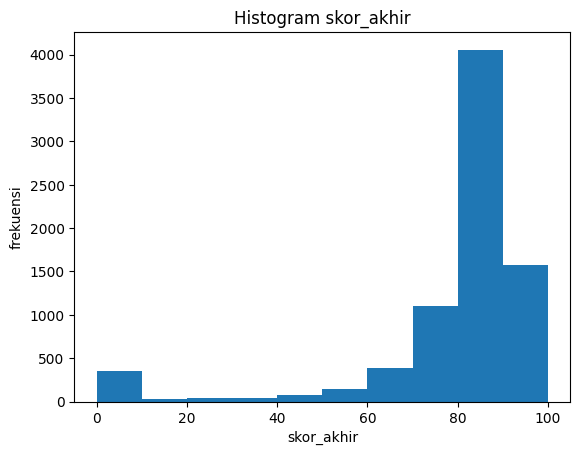

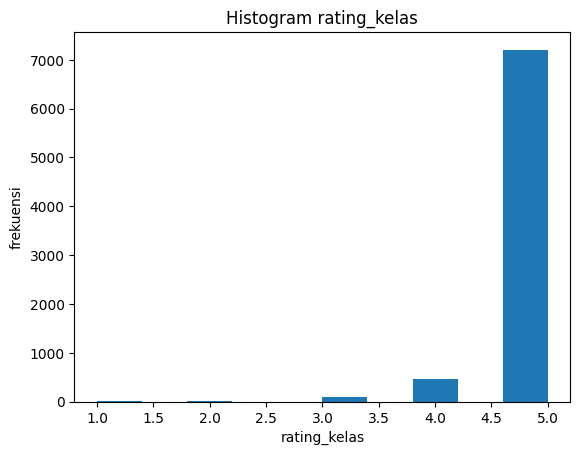

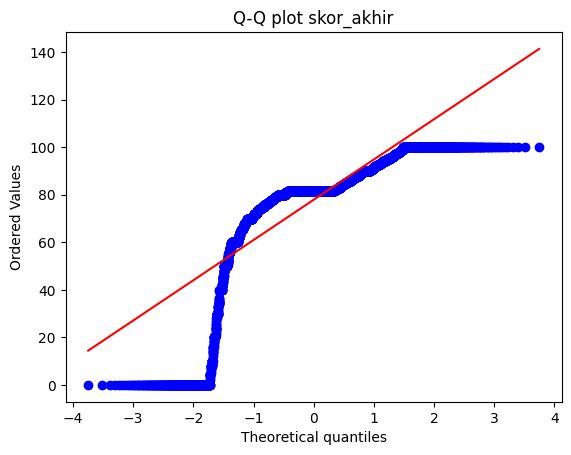

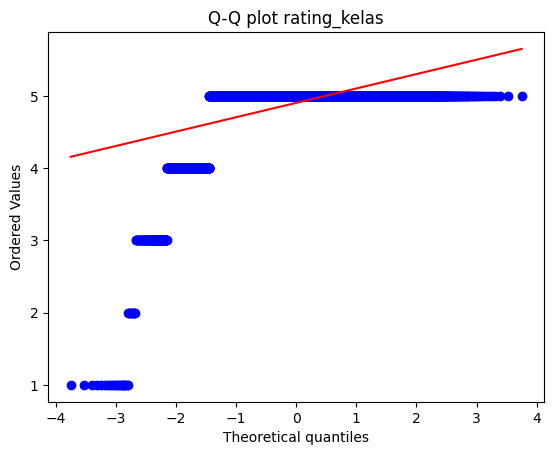

In [ ]:
# membuat histogram skor_akhir
plt.hist(data['skor_akhir'])
plt.title('Histogram skor_akhir')
plt.xlabel('skor_akhir')
plt.ylabel('frekuensi')
plt.show()

# membuat histogram rating_kelas
plt.hist(data['rating_kelas'])
plt.title('Histogram rating_kelas')
plt.xlabel('rating_kelas')
plt.ylabel('frekuensi')
plt.show()

# membuat Q-Q plot skor_akhir
stats.probplot(data['skor_akhir'], plot=plt)
plt.title('Q-Q plot skor_akhir')
plt.show()

# membuat Q-Q plot rating_kelas
stats.probplot(data['rating_kelas'], plot=plt)
plt.title('Q-Q plot rating_kelas')
plt.show()


berarti bahwa variabel skor_akhir dan rating_kelas tidak memiliki hubungan linier yang kuat

In [ ]:
#uji menggunakan linear regresi sederhana
X = data[['skor_akhir']]
Y = data['rating_kelas']
lr = LinearRegression()
lr.fit(X,Y)
lr.score(X,Y)

7.47185962481911e-05

nilai skor regresi linier yang sangat rendah (7.47185962481911e-05) menunjukkan bahwa model tidak sesuai dengan data dengan baik. Ini bisa berarti bahwa variabel skor_akhir dan rating_kelas tidak memiliki hubungan linier yang kuat

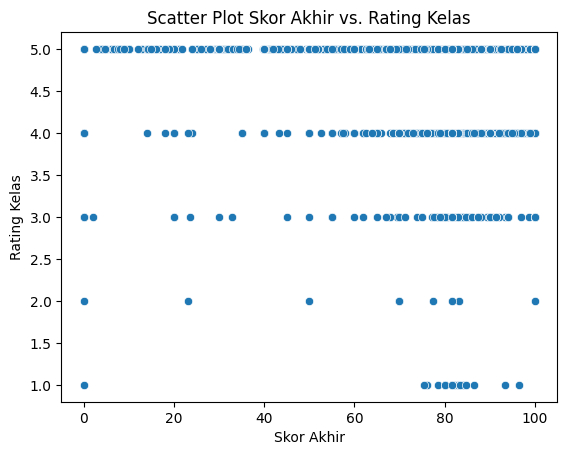

Korelasi Pearson = 0.0086. p-value = 0.4456. Hipotesis nol diterima. Tidak ada korelasi yang signifikan.


In [ ]:
# Mengambil data skor_akhir dan rating_kelas
data_skor_rating = data[['skor_akhir', 'rating_kelas']]

# Visualisasi Scatter Plot
sns.scatterplot(x='skor_akhir', y='rating_kelas', data=data_skor_rating)
plt.title('Scatter Plot Skor Akhir vs. Rating Kelas')
plt.xlabel('Skor Akhir')
plt.ylabel('Rating Kelas')
plt.show()

# Uji korelasi Pearson
corr_coefficient, p_value_corr = pearsonr(data_skor_rating['skor_akhir'], data_skor_rating['rating_kelas'])

# Menampilkan hasil uji korelasi
if p_value_corr < 0.05:
    print(f'Korelasi Pearson = {corr_coefficient:.4f}. p-value = {p_value_corr:.4f}. Hipotesis nol ditolak. Ada korelasi yang signifikan.')
else:
    print(f'Korelasi Pearson = {corr_coefficient:.4f}. p-value = {p_value_corr:.4f}. Hipotesis nol diterima. Tidak ada korelasi yang signifikan.')


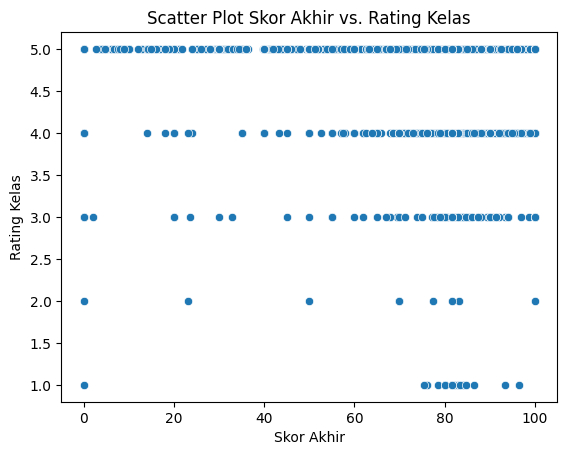

Korelasi Spearman = 0.0016. p-value = 0.8845. Hipotesis nol diterima. Tidak ada korelasi yang signifikan.


In [ ]:
# Mengambil data skor_akhir dan rating_kelas
data_skor_rating = data[['skor_akhir', 'rating_kelas']]

# Visualisasi Scatter Plot
sns.scatterplot(x='skor_akhir', y='rating_kelas', data=data_skor_rating)
plt.title('Scatter Plot Skor Akhir vs. Rating Kelas')
plt.xlabel('Skor Akhir')
plt.ylabel('Rating Kelas')
plt.show()

# Uji korelasi Spearman
from scipy.stats import spearmanr # impor fungsi spearmanr
rho, p_value_corr = spearmanr(data_skor_rating['skor_akhir'], data_skor_rating['rating_kelas']) # hitung korelasi Spearman dan nilai p

# Menampilkan hasil uji korelasi
if p_value_corr < 0.05:
    print(f'Korelasi Spearman = {rho:.4f}. p-value = {p_value_corr:.4f}. Hipotesis nol ditolak. Ada korelasi yang signifikan.')
else:
    print(f'Korelasi Spearman = {rho:.4f}. p-value = {p_value_corr:.4f}. Hipotesis nol diterima. Tidak ada korelasi yang signifikan.')


## Bisnis Question 3
Bagaimana perbandingan umur dan jenis kelamin pengguna pada bidang studi yang
populer berdasarkan aktivitas belajar?

In [ ]:
# menghitung aktivitas belajar untuk setiap bidang studi
aktivitas = data.groupby('bidang_studi')['id_pengguna'].count()

# menampilkan hasil perhitungan
print(aktivitas)


bidang_studi
3D & Animasi                            1
Administrasi                           39
Administrasi Infrastruktur Jaringan     1
Administrasi Pajak                      9
Administrasi Perhotelan                 4
                                       ..
Teknologi Terapan                      34
User Experience                         3
User Interface                          1
Videografi                             17
Web Development                        10
Name: id_pengguna, Length: 219, dtype: int64


In [ ]:
# mencari nilai maksimum dari aktivitas belajar
max_aktivitas = aktivitas.max()

# mencari nama bidang studi yang populer
populer = aktivitas.idxmax()

# menampilkan hasil pencarian
print("Bidang studi yang populer adalah", populer, "dengan aktivitas belajar sebesar", max_aktivitas)


Bidang studi yang populer adalah Bisnis Manajemen dengan aktivitas belajar sebesar 682


In [ ]:
# membuat subset data
data_populer = data.loc[data['bidang_studi'] == populer]

# menampilkan subset data
print(data_populer)


                           id_pengguna      nama_pengguna tanggal_lahir  \
5     e54002bd545413dd006aef5c98925fd6       Tat*********    1991-10-17   
20    631d49f722e23eb00957486e039c0a8a         NUR*******    2002-03-07   
25    50dd0c33306f58a58b285604fda85495        Sam********    1975-07-01   
33    9b669ea1464f2fa2d42dfac59d7a932d      ACH**********    1999-03-28   
39    8101488c4a5bab53c80054ea87a8f489  Feb**************    2000-02-04   
...                                ...                ...           ...   
7935  c0e9ad926a4d3bbf4da74016c04b6570   Sit*************    1988-05-10   
7941  1e16d0bb7bc5a40f476aca2baefc4afa         LEO*******    2001-01-15   
7972  5f24180a159c9d0b58ddddcfaa878057      Ine**********    2002-10-04   
7977  0f5e885db57290eed5d7101d7a1dbf35            Sum****    1973-04-28   
7981  d941d2cccc12ce67c4eb528a54420ed9          Mad******    1997-01-16   

     jenis_kelamin                          id_kelas  \
5             male  262cf9b725395d261f41ca3

In [ ]:
# membuat fungsi untuk menghitung umur
def hitung_umur(tanggal_lahir):
    # menghitung selisih tanggal lahir dengan tanggal saat ini
    selisih = datetime.datetime.now() - tanggal_lahir

    # menghitung umur dalam tahun
    umur = selisih.days // 365

    # mengembalikan nilai umur
    return umur

# menghitung umur pengguna dengan menggunakan fungsi hitung_umur
data_populer['umur'] = data_populer['tanggal_lahir'].apply(lambda x: hitung_umur(x))

# menampilkan data dengan kolom umur
print(data_populer)


                           id_pengguna      nama_pengguna tanggal_lahir  \
5     e54002bd545413dd006aef5c98925fd6       Tat*********    1991-10-17   
20    631d49f722e23eb00957486e039c0a8a         NUR*******    2002-03-07   
25    50dd0c33306f58a58b285604fda85495        Sam********    1975-07-01   
33    9b669ea1464f2fa2d42dfac59d7a932d      ACH**********    1999-03-28   
39    8101488c4a5bab53c80054ea87a8f489  Feb**************    2000-02-04   
...                                ...                ...           ...   
7935  c0e9ad926a4d3bbf4da74016c04b6570   Sit*************    1988-05-10   
7941  1e16d0bb7bc5a40f476aca2baefc4afa         LEO*******    2001-01-15   
7972  5f24180a159c9d0b58ddddcfaa878057      Ine**********    2002-10-04   
7977  0f5e885db57290eed5d7101d7a1dbf35            Sum****    1973-04-28   
7981  d941d2cccc12ce67c4eb528a54420ed9          Mad******    1997-01-16   

     jenis_kelamin                          id_kelas  \
5             male  262cf9b725395d261f41ca3

<ipython-input-44-b7063c76d151>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_populer['umur'] = data_populer['tanggal_lahir'].apply(lambda x: hitung_umur(x))


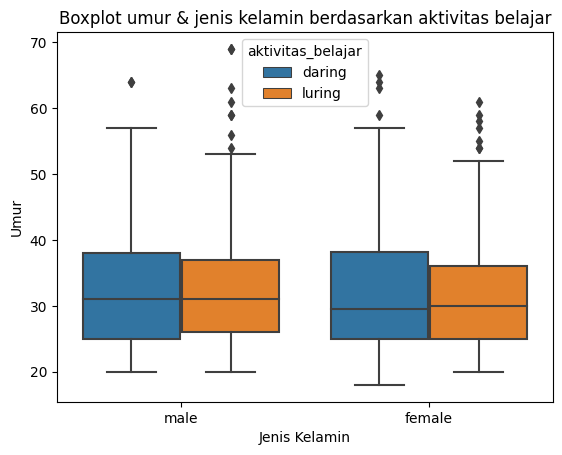

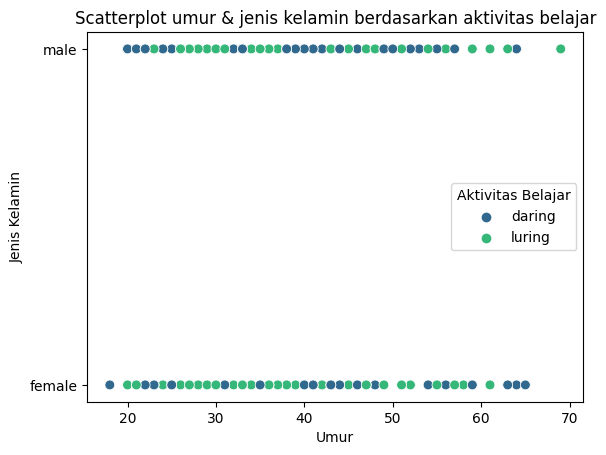

In [ ]:
# Membuat boxplot umur berdasarkan jenis kelamin dan aktivitas belajar
sns.boxplot(x='jenis_kelamin', y='umur', hue='aktivitas_belajar', data=data_populer)
plt.title('Boxplot umur & jenis kelamin berdasarkan aktivitas belajar')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Umur')
plt.show()

# Membuat scatterplot umur berdasarkan jenis kelamin dan aktivitas belajar
sns.scatterplot(data=data_populer, x='umur', y='jenis_kelamin', hue='aktivitas_belajar', palette='viridis', s=50)
plt.title('Scatterplot umur & jenis kelamin berdasarkan aktivitas belajar')
plt.xlabel('Umur')
plt.ylabel('Jenis Kelamin')
plt.legend(title='Aktivitas Belajar')
plt.show()


## Bisnis Question 4
Jika tim bisnis ingin membuka kelas luring yang menargetkan pengguna daring untuk
mendaftar pada peminatan tertentu. Rekomendasikan daftar pengguna daring yang
dapat ditargetkan menjadi pengguna luring untuk peminatan bidang studi bahasa
inggris?

In [ ]:
# membuat subset data
data_inggris = data.loc[data['bidang_studi'] == 'Bahasa Inggris']

# menampilkan subset data
print(data_inggris)

                           id_pengguna       nama_pengguna tanggal_lahir  \
87    eb69db4445c577332ccec5442affce20           Nas******    1994-11-11   
98    51713b470c80c76fe56958331cfe6d0e       DED**********    1975-05-28   
100   ea936586a473fbb38b017889e725fab8               riz**    2001-12-22   
102   d3afee770dc01ddb227f9c15f5af86d0      Dev***********    1999-12-08   
158   930d543a07648535fc9085c6063a0110       Afa**********    1997-09-09   
...                                ...                 ...           ...   
7641  5cc9d61d1ff675e25b8d5a10d77f5556                Rom*    1987-05-22   
7668  1ae166530183040c56944f100b979669         yus********    1973-06-24   
7773  e5d564867957cbfffcb1713d5d5bc3c0        War*********    1996-01-01   
7775  067238bc6aa45069942c3ed7b63bc2ee    fit*************    1996-08-05   
7797  d49ffcae974661872a49030c97d18317  Cec***************    1998-01-30   

     jenis_kelamin                          id_kelas  \
87            male  98c097fad98

In [ ]:
# melihat statistik deskriptif dari data numerik
data_inggris.describe()

# melihat frekuensi dari data kategorik
data_inggris['jenis_kelamin'].value_counts()


male      137
female     92
Name: jenis_kelamin, dtype: int64

In [ ]:
# membuat subset data dengan kriteria tertentu
# dalam hal ini, kriteria adalah skor akhir di atas 80, rating kelas di atas 4, dan aktivitas belajar sama dengan "daring"
data_target = data_inggris.loc[(data_inggris['skor_akhir'] <= 70) & (data_inggris['rating_kelas'] <= 5) & (data_inggris['aktivitas_belajar'] == 'daring')]

# menampilkan subset data
print(data_target)

                           id_pengguna            nama_pengguna tanggal_lahir  \
1706  cc45efe4c08492eba974904e255771e4                  Fah****    1998-06-16   
2127  0e176a8835d558d6e5f2a0aa0aa73f04                   PAR***    1999-06-15   
2210  280a2d5063935b495141777892df988c             Tia*********    2001-03-13   
2658  a7551e46c22aca9388d8976a2bcef1f2            yus**********    1980-02-16   
3514  be64ef3766598ca9f12a04b019e531b1               Bah*******    1983-09-19   
3636  fe863fd935bc8617c51908183e66a98c             HAI*********    1994-06-17   
3743  4cc30bd954a14efedb5d75ab076b6033         EL *************    1991-11-20   
3771  0bf58330ef70bbdf0a9859a8c6122af8             ELI*********    1993-02-12   
4015  1ce712838f993ae1cdadd5d7ce2a1a16                Abu******    1947-03-02   
5031  2a3c08d0043afc82fd09a90db98ced0a  Put********************    1992-02-04   
5411  3dbc585e31637e7a82d6e61541284189              Yul********    1996-07-21   
5598  4ed028387384d5396105c1

In [ ]:
# membuat DataFrame dari list nama pengguna
nama_target = data_target['nama_pengguna'].tolist()
df_nama_target = pd.DataFrame({'nama_pengguna':nama_target})

# menampilkan DataFrame
print(df_nama_target)


              nama_pengguna
0                   Fah****
1                    PAR***
2              Tia*********
3             yus**********
4                Bah*******
5              HAI*********
6          EL *************
7              ELI*********
8                 Abu******
9   Put********************
10              Yul********
11              Sri********
12                   Hal***


# Menyimpan Hasil akhir

In [ ]:
# Simpan ke file baru
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/data_bersih.csv'
data.to_csv(file_path, index=False)

Mounted at /content/drive


In [ ]:
# membuat subset data dengan kriteria tertentu
# dalam hal ini, kriteria adalah skor akhir di atas 70, rating kelas di atas 4, dan aktivitas belajar sama dengan "daring"
data_rate = data.loc[(data['rating_kelas'] >= 5) ]

# menampilkan subset data
print(data_rate)

                           id_pengguna                       nama_pengguna  \
0     84712c881cf472d8afca2b957cd573b0                             V E****   
1     747a026a8dab2607509f154d2c67f51d  Muh*******************************   
2     4772f54956a70a1d1546494bb839760b                      WID***********   
3     d6be63e9ae829aae2e0c09980e9d76c2       MUH**************************   
4     406ab42268988ae9553faba35e3c06f2                 Ann****************   
...                                ...                                 ...   
7988  bc98fdd893e5aca3d4c8446b418b712f                             Ros****   
7989  2b9998c2c60175c9d4993af96545b851                      SAN***********   
7990  3b6f6030630e0449e71b72476b38429f                     M F************   
7991  f4b6e9a1b3d496c8511ae9f31b7b10da                       LIL**********   
7992  19e0cfe1c78ce38e4ec4fe8430840819    ELI*****************************   

     tanggal_lahir jenis_kelamin                          id_ke

In [ ]:
# membuat subset data dengan kriteria tertentu
# dalam hal ini, kriteria adalah skor akhir di atas 70, rating kelas di atas 4, dan aktivitas belajar sama dengan "daring"
data_rate = data.loc[(data['skor_akhir'] >= 70) & (data['rating_kelas'] >= 5) ]

# menampilkan subset data
print(data_rate)

                           id_pengguna                       nama_pengguna  \
0     84712c881cf472d8afca2b957cd573b0                             V E****   
1     747a026a8dab2607509f154d2c67f51d  Muh*******************************   
2     4772f54956a70a1d1546494bb839760b                      WID***********   
3     d6be63e9ae829aae2e0c09980e9d76c2       MUH**************************   
4     406ab42268988ae9553faba35e3c06f2                 Ann****************   
...                                ...                                 ...   
7987  7526b4b03d267e24e14743da8d967b76                     Sop************   
7988  bc98fdd893e5aca3d4c8446b418b712f                             Ros****   
7990  3b6f6030630e0449e71b72476b38429f                     M F************   
7991  f4b6e9a1b3d496c8511ae9f31b7b10da                       LIL**********   
7992  19e0cfe1c78ce38e4ec4fe8430840819    ELI*****************************   

     tanggal_lahir jenis_kelamin                          id_ke